# Backpropagation

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = load_iris()
X=data.data
y=data.target

y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=30)

# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 3 
results = pd.DataFrame(columns=["mse", "accuracy"])

# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5,size=(input_size,hidden_size))
 
# initializing weight for the output layer
W2= np.random.normal(scale=0.5,size=(hidden_size,output_size))


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

for itr in range(iterations): 
 
 # feedforward propagation
 # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
 # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
 
 # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
 
 # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
 # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

<AxesSubplot:title={'center':'Mean Squared Error'}>

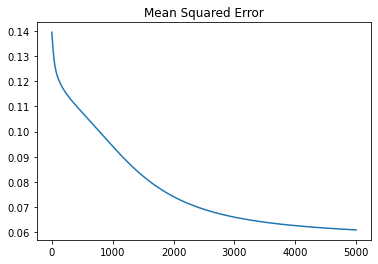

In [3]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

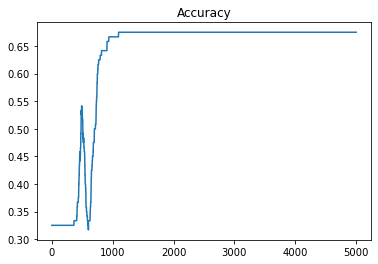

In [4]:
results.accuracy.plot(title="Accuracy")

In [6]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.6333333333333333
